<a href="https://colab.research.google.com/github/mkitti/COVID-19/blob/lavery_notebook/Covid-19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Covid-19 Notebook
## Original notebook by Leon Avery, PhD
https://www.facebook.com/leon.avery.10/posts/10221691168285770
Original version: http://www.math.uwaterloo.ca/~lavery/Covid-19/

This notebook has been adapted by Mark Kittisopikul, PhD, for general use. This notebook
1. Pulls data from Johns Hopkins University Center for Systems Science and Engineering at https://github.com/CSSEGISandData/COVID-19
2. Imports the data into a table via Pandas
3. Plots the data

# Other Works

## Using Python scientific tools for a (rough) analysis of COVID-19 data

https://medium.com/@santiagocasas/using-python-scientific-tools-for-a-rough-analysis-of-covid-19-data-d3ac58f474bf
https://colab.research.google.com/drive/1Q_VWV6XsD9yMNoKEQpQ9Xe23bwb0UFym

In [1]:
import os, csv
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import numpy as np
%matplotlib inline

In [2]:
nation = 'US'
series = 'Confirmed'

In [3]:
# Retrieve data via git
datasource = 'https://github.com/CSSEGISandData/COVID-19.git'

if(os.path.isdir('csse_covid_19_data')):
  # Assume we are in a cloned git repository
  subprocess.run(['git','remote','add','CSSEGISandData',datasource])
  subprocess.run(['git','fetch','CSSEGISandData'])
  subprocess.run(['git','merge','CSSEGISandData/master'])
  print('Data merged')
else:
  # Assume no data has been downloaded
  subprocess.run(['git','clone',datasource])
  os.chdir('COVID-19')
  print('Data cloned')

Data merged


In [4]:
covid19_dir = os.getcwd();
ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    'time_series_19-covid-{series}.csv'.format(series=series)    
)
[
    covid19_dir,
    ts_file
];

In [5]:
with open(ts_file, 'r') as csvfile:
    tsreader = csv.DictReader(csvfile)
    ts_data = list(tsreader)

In [6]:
ts_frame = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
ts_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,50,50,53,59,70,75,82,114,147,177
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,502,511,581,639,639,701,773,839,825,878
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,150,150,160,178,178,200,212,226,243,266
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,99,117,129,149,149,197,238,428,566,673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,Cayman Islands,United Kingdom,19.3133,-81.2546,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,1
456,Reunion,France,-21.1351,55.2471,0,0,0,0,0,0,...,0,0,0,1,1,5,6,7,9,9
457,NaN,Barbados,13.1939,-59.5432,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
458,NaN,Montenegro,42.5000,19.3000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2


In [7]:
list(ts_frame.loc[:,'Country/Region']);

In [8]:
nationrows = ts_frame.loc[:, 'Country/Region'] == nation
nationrows;

In [9]:
nation_frame = ts_frame[nationrows]
nation_frame

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20
98,Washington,US,47.4009,-121.4905,0,0,0,0,0,0,...,0,0,267,366,442,568,572,643,904,1076
99,New York,US,42.1657,-74.9481,0,0,0,0,0,0,...,0,0,173,220,328,421,525,732,967,1706
100,California,US,36.1162,-119.6816,0,0,0,0,0,0,...,0,0,144,177,221,282,340,426,557,698
101,Massachusetts,US,42.2302,-71.5301,0,0,0,0,0,0,...,0,0,92,95,108,123,138,164,197,218
102,Diamond Princess,US,35.4437,139.6380,0,0,0,0,0,0,...,45,45,46,46,46,46,46,46,47,47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,"New Castle, DE",US,39.5393,-75.6674,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
415,Alabama,US,32.3182,-86.9023,0,0,0,0,0,0,...,0,0,0,0,0,5,6,12,29,39
418,Puerto Rico,US,18.2208,-66.5901,0,0,0,0,0,0,...,0,0,0,0,0,0,3,5,5,5
434,Guam,US,13.4443,144.7937,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,3,3


In [10]:
nation_frame.aggregate(np.sum)[-7:]

3/11/20    1281
3/12/20    1663
3/13/20    2179
3/14/20    2727
3/15/20    3499
3/16/20    4632
3/17/20    6421
dtype: object

In [11]:
nation_series = nation_frame.agg(np.sum)[4:]
[
    type(nation_series),
    nation_series
];

In [12]:
strdates = nation_series.keys()
dates = [pd.to_datetime(sd) for sd in strdates]
[
    type(strdates),
    strdates,
    type(dates),
    dates,
    np.array(nation_series[:])
];

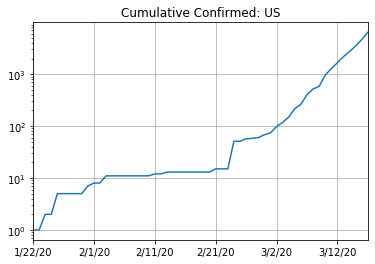

In [13]:
nation_series.plot(
    logy=True, 
    title=f'Cumulative {series}: {nation}'
)
plt.grid(True)

In [14]:
# Load series into a dict of pandas dataframes
series_options = ['Confirmed','Deaths','Recovered']
series_frames = dict();
for series in series_options:
  ts_file = os.path.join(
    covid19_dir,
    'csse_covid_19_data',
    'csse_covid_19_time_series',
    f'time_series_19-covid-{series}.csv'    
  )
  series_frames[series] = pd.read_csv(ts_file, parse_dates=True, date_parser=pd.to_datetime)
    
series_frames.keys()

dict_keys(['Confirmed', 'Deaths', 'Recovered'])

In [15]:
nation_series_cache = dict()
def get_nation_series(nation,series):
  if nation in nation_series_cache and series in nation_series_cache[nation]:
    nation_series = nation_series_cache[nation][series]
  else:
    ts_frame = series_frames[series]
    nationrows = ts_frame.loc[:, 'Country/Region'] == nation
    nation_frame = ts_frame[nationrows]
    nation_series = nation_frame.agg(np.sum)[4:]
    if nation not in nation_series_cache:
        nation_series_cache[nation] = dict()
    nation_series_cache[nation][series] = nation_series

  strdates = nation_series.keys()
  dates = [pd.to_datetime(sd) for sd in strdates]

  return (nation_series,dates)

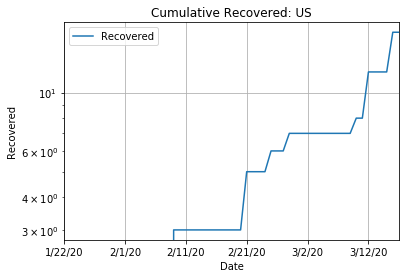

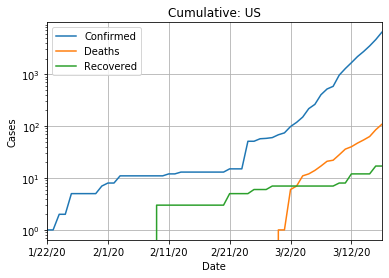

In [16]:
nations = sorted(ts_frame.loc[:,'Country/Region'].unique())
#series_options = ['Confirmed','Deaths','Recovered']
#series_options = [re.match(r'time_series_19-covid-(.*).csv',file)[1] for file in os.listdir(os.path.join(
#    covid19_dir,
#    'csse_covid_19_data',
#    'csse_covid_19_time_series'))
#  if re.match(r'time_series_19-covid-(.*).csv',file)
#]

# Plot a single series combining all the code above

def plot_single_series(nation,series):
  nation_series, dates = get_nation_series(nation,series)
  nation_series.plot(
      logy=True, 
      title=f'Cumulative {series}: {nation}'
  )
  plt.grid(True)
  plt.ylabel(series)
  plt.xlabel('Date')
  plt.legend([series])

# Plot all the series
def plot_all_series(nation):
  for series in series_options:
    plot_single_series(nation,series)
  plt.ylabel('Cases')
  plt.legend(series_options)
  plt.title(f'Cumulative: {nation}')

plt.figure()
plot_single_series(nation,series)

plt.figure()
plot_all_series(nation)

In [17]:
from ipywidgets import interactive
import ipywidgets as widgets

nations_widget = widgets.Dropdown(
    options = nations,
    value = nation,
    description = "Nation: "
)

interactive(plot_single_series,nation=nations_widget,series=series_options)

interactive(children=(Dropdown(description='Nation: ', index=144, options=('Afghanistan', 'Albania', 'Algeria'…

In [18]:
interactive(plot_all_series,nation=nations_widget)

interactive(children=(Dropdown(description='Nation: ', index=144, options=('Afghanistan', 'Albania', 'Algeria'…

# Rate Estimation

We would like to measure rates to understand how quickly the number of cases is increasing or decreasing. We expect the rate to be exponential, so our interest is in the slope of log plots above. We would also like to know these slopes over time.

Because the data is noisy, some fitting is required. Here I have chosen to do a spline fit. Once the spline fit is obtained, obtaining the derivatives is straightforward.

The derivative of the log of a function is the derivative of the function over the value of the function. For this data, this would give us how the rate of increase of cases compares to the number of cases.

In [19]:
from scipy.interpolate import UnivariateSpline 
from scipy.interpolate import LSQUnivariateSpline

x = np.arange(nation_series.shape[0])
y = np.log10(np.float64(nation_series)+1)
knot_interval = 14;
t = np.flip(np.arange(nation_series.shape[0]-knot_interval,0,-knot_interval))
# Weight the last days by a factor of 10
w = np.ones_like(y)
w[-4:] = 10
nation_sp = UnivariateSpline(x,y,w)
nation_lsq_sp = LSQUnivariateSpline(x,y,t,w=w)
nation_sp_deriv = nation_sp.derivative(1)
nation_lsq_sp_deriv = nation_lsq_sp.derivative(1)

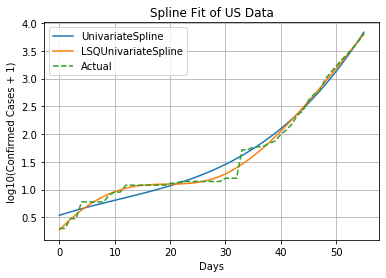

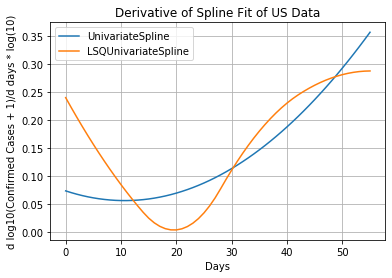

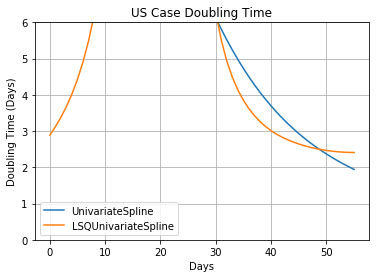

In [20]:
plt.figure()
plt.plot(x,nation_sp(x))
plt.plot(x,nation_lsq_sp(x))
plt.plot(x,y,'--')
plt.grid(True)
plt.title(f'Spline Fit of {nation} Data')
plt.ylabel('log10(Confirmed Cases + 1)')
plt.xlabel('Days')
plt.legend(['UnivariateSpline','LSQUnivariateSpline','Actual'])


plt.figure()
plt.plot(x,nation_sp_deriv(x)*np.log(10))
plt.plot(x,nation_lsq_sp_deriv(x)*np.log(10))
plt.grid(True)
plt.title(f'Derivative of Spline Fit of {nation} Data')
plt.xlabel('Days')
plt.ylabel('d log10(Confirmed Cases + 1)/d days * log(10)')
plt.legend(['UnivariateSpline','LSQUnivariateSpline'])

plt.figure()
plt.plot(x,np.log(2)/(nation_sp_deriv(x)*np.log(10)))
plt.plot(x,np.log(2)/(nation_lsq_sp_deriv(x)*np.log(10)))
plt.grid(True)
plt.title(f'{nation} Case Doubling Time')
plt.xlabel('Days')
plt.ylabel('Doubling Time (Days)')
plt.ylim(0,6)
plt.legend(['UnivariateSpline','LSQUnivariateSpline'])


In [21]:
def plot_spline_deriv(nation,series="Confirmed"):
  nation_series, dates = get_nation_series(nation,series)

  # We add 1 here to avoid taking the log of 0 if no data exists
  x = np.arange(nation_series.shape[0])
  y = np.log10(np.float64(nation_series+1))
  knot_interval = 14;
  t = np.flip(np.arange(nation_series.shape[0]-knot_interval,0,-knot_interval))

  # Weight the last days by a factor of 10
  w = np.ones_like(y)
  w[-4:] = 10
  #nation_sp = UnivariateSpline(x,y,w)
  nation_lsq_sp = LSQUnivariateSpline(x,y,t,w=w)
  #nation_sp_deriv = nation_sp.derivative(1)
  nation_lsq_sp_deriv = nation_lsq_sp.derivative(1)

  #plt.subplot(1,2,1)
  plt.figure()
  #plt.plot(dates,nation_sp(x))
  plt.plot(dates,nation_lsq_sp(x))
  plt.plot(dates,y)
  plt.grid(True)
  plt.title(f'Spline Fit of {nation} Data')
  plt.ylabel(f'log10({series} Cases+1)')
  #plt.xlabel('Days')
  plt.xticks(rotation=90)

  #plt.subplot(1,2,2)
  plt.figure()
  #plt.plot(dates,nation_sp_deriv(x)*np.log(10))
  plt.plot(dates,nation_lsq_sp_deriv(x)*np.log(10))
  plt.grid(True)
  plt.title(f'Derivative of Spline Fit of {nation} Data')
  #plt.xlabel('Days')
  plt.ylabel('d log10({series} Cases+1)/d days  * log(10)')
  plt.xticks(rotation=90)


In [22]:
interactive(plot_spline_deriv,nation=nations_widget,series=series_options)

interactive(children=(Dropdown(description='Nation: ', index=144, options=('Afghanistan', 'Albania', 'Algeria'…

In [23]:
def plot_spline_double_time(nation,series="Confirmed"):
  nation_series, dates = get_nation_series(nation,series)

  # We add 1 here to avoid taking the log of 0 if no data exists
  x = np.arange(nation_series.shape[0])
  y = np.log10(np.float64(nation_series+1))
  knot_interval = 14;
  t = np.flip(np.arange(nation_series.shape[0]-knot_interval,0,-knot_interval))

  # Weight the last days by a factor of 10
  w = np.ones_like(y)
  w[-4:] = 10
  #nation_sp = UnivariateSpline(x,y,w)
  nation_lsq_sp = LSQUnivariateSpline(x,y,t,w=w)
  #nation_sp_deriv = nation_sp.derivative(1)
  nation_lsq_sp_deriv = nation_lsq_sp.derivative(1)

  #plt.subplot(1,2,1)
  plt.figure()
  plt.plot(dates,nation_lsq_sp(x))
  plt.plot(dates,y)
  plt.grid(True)
  plt.title(f'Spline Fit of {nation} Data')
  plt.ylabel(f'log10({series} Cases+1)')
  #plt.xlabel('Days')
  plt.xticks(rotation=90)

  #plt.subplot(1,2,2)
  plt.figure()
  plt.plot(dates,np.log(2)/(nation_lsq_sp_deriv(x)*np.log(10)))
  plt.grid(True)
  plt.title(f'{nation} Doubling Time')
  #plt.xlabel('Days')
  plt.ylabel('Doubling Time (days)')
  plt.xticks(rotation=90)
  plt.ylim(bottom=0,top=6)

In [24]:
interactive(plot_spline_double_time,nation=nations_widget,series=series_options)

interactive(children=(Dropdown(description='Nation: ', index=144, options=('Afghanistan', 'Albania', 'Algeria'…

In [25]:
from scipy import stats
def do_linear_regression(nation,series,n_points,days_back):
  nation_series, dates = get_nation_series(nation,series)
  days = np.arange(0,nation_series.shape[0])
  y = np.log(np.float64(nation_series+1))
  if days_back >= 0:
    s = slice(-n_points,None)
  else:
    s = slice(-n_points+days_back,days_back)
  lr = stats.linregress(days[s],y[s])
  
  plt.plot(days,y)
  line = lr.slope*days[s]+lr.intercept
  plt.plot(days[s],line)
  plt.grid(True)

  plt.xlabel('Days')
  plt.ylabel('log(Cases+1)')

  str = f"""Slope: {lr.slope:.3f}
Doubling time: {np.inf if lr.slope==0 else 0.693/lr.slope:.3f} days
Daily increase: {(np.exp(lr.slope)-1)*100:2.0f}%"""

  plt.text(days[s][0]-25,line[0],str)

  return lr
    
interactive(do_linear_regression,
            nation=nations_widget,
            series=series_options,
            n_points=widgets.IntSlider(value=4,min=2,max=nation_series.shape[0]),
            days_back=widgets.IntSlider(value=0,min=-nation_series.shape[0],max=0)
           )

interactive(children=(Dropdown(description='Nation: ', index=144, options=('Afghanistan', 'Albania', 'Algeria'…

In [26]:
days = np.arange(0,nation_series.shape[0])
days[slice(-5,None)]

array([51, 52, 53, 54, 55])

# Extrapolation

Here we extrapolate at an exponential rate from the most recent case number.

In [27]:
def get_linear_regression_of_log(nation_series,s = slice(-4,None)):
    lr = stats.linregress(np.arange(0,nation_series.shape[0])[s],np.log(np.float64(nation_series[s])))
    return lr
    
def days_until(nation_A,nation_B,series='Confirmed'):
    nation_A_series = get_nation_series(nation_A,series)[0]
    nation_B_series = get_nation_series(nation_B,series)[0]
    lr = get_linear_regression_of_log(nation_A_series)
    days = np.log(nation_B_series[-1]/nation_A_series[-1])/lr.slope
    print(f'{nation_A} will where {nation_B} is now in {days:.1f} days for {series}')
    return days

days_until('US','Italy')
days_until('US','China')

US will where Italy is now in 5.6 days for Confirmed
US will where China is now in 8.9 days for Confirmed


8.897975902200354

In [28]:
day_to_day = dict()
day_to_day['ratio'] = nation_series[-1]/nation_series[-2]
day_to_day['coef'] = np.log(day_to_day['ratio'])
day_to_day['doubling_time'] = np.log(2)/day_to_day['coef']
day_to_day

{'ratio': 1.3862262521588946,
 'coef': 0.3265851285412172,
 'doubling_time': 2.122408891231756}

LinregressResult(slope=0.2849626821730523, intercept=-6.925687735693259, rvalue=0.9981515078525777, pvalue=0.001848492147422331, stderr=0.012268727978365672)

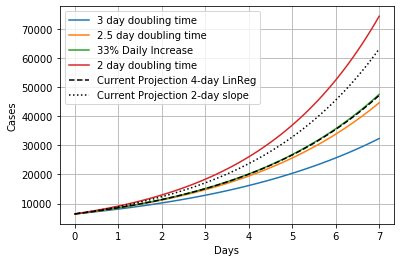

In [29]:
us_confirmed_lr = get_linear_regression_of_log(nation_series)

t = np.arange(0,7.1,0.1)
plt.plot(t,np.exp(0.231*t)*nation_series[-1])
plt.plot(t,np.exp(0.277*t)*nation_series[-1])
plt.plot(t,np.exp(0.286*t)*nation_series[-1])
plt.plot(t,np.exp(0.35*t)*nation_series[-1])
plt.plot(t,np.exp(us_confirmed_lr.slope*t)*nation_series[-1],'k--')
plt.plot(t,np.exp(day_to_day['coef']*t)*nation_series[-1],'k:')
plt.grid(True)
plt.ylabel('Cases')
plt.xlabel('Days')
plt.legend(['3 day doubling time',
            '2.5 day doubling time',
            '33% Daily Increase',
            '2 day doubling time',
            'Current Projection 4-day LinReg',
            'Current Projection 2-day slope'])
us_confirmed_lr

In [30]:
nation_series[-4:]

3/14/20    2727
3/15/20    3499
3/16/20    4632
3/17/20    6421
dtype: object

In [31]:
nation_series[-4:]/np.array(nation_series[-5:-1])

3/14/20    1.25149
3/15/20    1.28309
3/16/20    1.32381
3/17/20    1.38623
dtype: object

In [32]:
from datetime import timedelta
from datetime import date
next_day_projection = np.exp(us_confirmed_lr.slope)*nation_series[-1]
next_day = (dates[-1]+timedelta(days=1)).date().isoformat()
print(f'US Confirmed Case Projection {next_day}: {next_day_projection:0.1f}')

US Confirmed Case Projection 2020-03-18: 8538.1
